# Loan Prediction

In [1]:
from os.path import join

import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
# reading data

dataset_path = join('..', 'dataset')

loan_data = pd.read_csv(join(dataset_path, 'loan_approval_dataset.csv'))
loan_data.head()

,loan_id,no_of_dependents,is_graduated,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,True,False,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,False,True,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,True,False,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,True,False,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,False,True,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [3]:
loan_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   loan_id                   4269 non-null   int64
 1   no_of_dependents          4269 non-null   int64
 2   is_graduated              4269 non-null   bool 
 3   self_employed             4269 non-null   bool 
 4   income_annum              4269 non-null   int64
 5   loan_amount               4269 non-null   int64
 6   loan_term                 4269 non-null   int64
 7   cibil_score               4269 non-null   int64
 8   residential_assets_value  4269 non-null   int64
 9   commercial_assets_value   4269 non-null   int64
 10  luxury_assets_value       4269 non-null   int64
 11  bank_asset_value          4269 non-null   int64
 12  loan_status               4269 non-null   int64
dtypes: bool(2), int64(11)
memory usage: 375.3 KB


In [4]:
loan_data.columns

Index(['loan_id', 'no_of_dependents', 'is_graduated', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [5]:
pd.pivot_table(loan_data, values='loan_status', index='is_graduated', columns='self_employed', aggfunc='sum')

self_employed,False,True
is_graduated,,
False,637,680
True,681,658


In [6]:
pd.pivot_table(loan_data, index='is_graduated', columns='self_employed', aggfunc='count')

bank_asset_value       cibil_score        \
self_employed            False True        False True    
is_graduated                                             
False                     1030  1095        1030  1095   
True                      1089  1055        1089  1055   

              commercial_assets_value       income_annum       loan_amount  \
self_employed                   False True         False True        False   
is_graduated                                                                 
False                            1030  1095         1030  1095        1030   
True                             1089  1055         1089  1055        1089   

                     ... loan_status       loan_term        \
self_employed True   ...       False True      False True    
is_graduated         ...                                     
False          1095  ...        1030  1095      1030  1095   
True           1055  ...        1089  1055      1089  1055   

              luxury_assets_value       no_of_dependents        \
self_employed               False True             False True    
is_graduated                                                     
False                        1030  1095             1030  1095   
True                         1089  1055             1089  1055   

              residential_assets_value        
self_employed                    False True   
is_graduated                                  
False                             1030  1095  
True                              1089  1055  

[2 rows x 22 columns]

In [7]:
approved_loan_data = loan_data.loc[loan_data['loan_status'] == 1]
rejected_loan_data = loan_data.loc[loan_data['loan_status'] == 0]

In [8]:
approved_loan_data.head()

,loan_id,no_of_dependents,is_graduated,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,True,False,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
6,7,5,True,False,8700000,33000000,4,678,22500000,14800000,29200000,4300000,1
8,9,0,True,True,800000,2200000,20,782,1300000,800000,2800000,600000,1
10,11,4,True,True,2900000,11200000,2,547,8100000,4700000,9500000,3100000,1
13,14,2,True,True,9100000,31500000,14,679,10800000,16600000,20900000,5000000,1


In [9]:
rejected_loan_data.head()

,loan_id,no_of_dependents,is_graduated,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1,2,0,False,True,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,True,False,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,True,False,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,False,True,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
5,6,0,True,True,4800000,13500000,10,319,6800000,8300000,13700000,5100000,0


In [10]:
len(approved_loan_data)

2656

In [11]:
pd.pivot_table(approved_loan_data, values='loan_status', index='is_graduated', columns='self_employed', aggfunc='count')

self_employed,False,True
is_graduated,,
False,637,680
True,681,658


In [12]:
pd.pivot_table(rejected_loan_data, values='loan_status', index='is_graduated', columns='self_employed', aggfunc='count')

self_employed,False,True
is_graduated,,
False,393,415
True,408,397


In [13]:
loan_data.groupby('loan_status').mean()

,loan_id,no_of_dependents,is_graduated,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
loan_status,,,,,,,,,,,,
0,2107.033478,2.538128,0.499070,0.503410,5.113825e+06,1.494606e+07,11.728456,429.468072,7.592498e+06,4.926720e+06,1.530694e+07,5.004960e+06
1,2151.984187,2.474774,0.504142,0.503765,5.025904e+06,1.524725e+07,10.397590,703.461973,7.399812e+06,5.001355e+06,1.501660e+07,4.959526e+06


In [14]:
approved_loan_data['cibil_score'].mean()

703.4619728915662

<Axes: xlabel='loan_status', ylabel='count'>

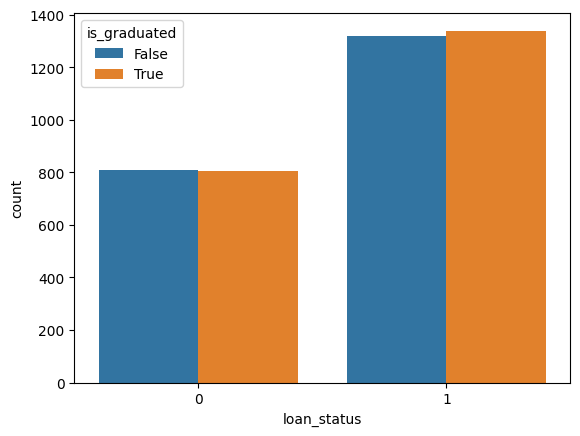

In [15]:
sns.countplot(x='loan_status',hue='is_graduated',data=loan_data)